In [2]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

# 教師なし学習とその難しさ
データセットの**教師なし変換(Unsuoervised transformation)**は、もとのデータ表現を変換して、人間や他のアルゴリズムにとってよりわかりやすい新しいデータ表現をつくつアルゴリズムである。  
一般的な方法は
- 次元圧縮：高次元のデータを入力として、少量の本質的な特徴を表す特徴量でそのデータを表す要約方法をみつける
- クラスタリング：データを似たような要素から構成されるグループに分けるアルゴリズム

教師なし学習のアルゴリズムにはラベル情報が全く含まれていないために、出力がどうあるべきなのか分からない。このため、教師なし学習は、大きな自動システムの一部として利用されるよりもデータサイエンティストがデータをよりよく理解するために、探索的に用いられる場合が多い。

## 前処理としての教師なし学習
前処理やスケール変換は教師あり学習とつなげて利用することが多いが、スケール変換は教師信号を利用しないので、教師なし学習の一種だと言える。

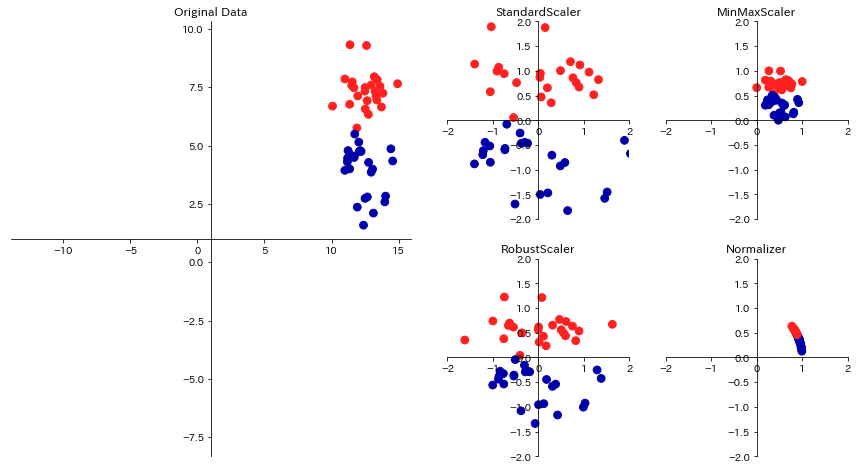

In [3]:
mglearn.plots.plot_scaling()

オリジナルデータ(x軸は10-15、y軸は1-9の間にデータがある)を左図にとり、右図はスケール変換をしたものである

- StandardScaler ： 個々の特徴量の平均が0で分散が1になるように変換する。しかし特徴量の最大値と最小値があるレンジに入ることを保証するものではない
- RubustScaler : StanderScalerと同じような動作をするが、平均値と分散の代わりに、中央値と四分位点を使用する。このため、RubastScalerは極端に他の値と異なるような値を無視する(データポイントを、中央値が0になり、四分位範囲が1になるように移動・スケール変換する)
https://qiita.com/unhurried/items/7a79d2f3574fb1d0cc27
- MinMaxScaler : データがちょうど0から1の間に入るように変換する。データの元のばらつきは保存される
- Normalizer : 個々のデータポイントを、特徴量ベクトルがユークリッド距離1になるように変換する。言い換えるとデータポイントを半径1の円(より高次元なら超球面)に投影する。したがってすべてのデータポイントに異なるスケール変換が行われる。この変換は、特徴量ベクトルの長さではなく、方向(もしくは角度)だけが問題になる場合に用いられる。

## データ変換の適用

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [6]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
X_train_scaled = scaler.transform(X_train)

In [21]:
print('transformed shape:{}'.format(X_train.shape))
print('pre-feature minmum before scaling:\n {}'.format(X_train.min(axis=0)))
print('pre-feature maximu before scaling:\n {}'.format(X_train.max(axis=0)))
print('pre-feature minmum after scaling:\n {}'.format(X_train_scaled.min(axis=0)))
print('pre-feature maximu after scaling:\n {}'.format(X_train_scaled.max(axis=0)))

transformed shape:(426, 30)
pre-feature minmum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
pre-feature maximu before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
pre-feature minmum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
pre-feature maximu after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


特徴量がシフトされて、すべての特徴量が0-1のスケールになっていることがわかる

In [22]:
X_test_scaled = scaler.transform(X_test)

In [23]:
print('pre-feature minmum after scaling:\n {}'.format(X_test_scaled.min(axis=0)))
print('pre-feature maximu after scaling:\n {}'.format(X_test_scaled.max(axis=0)))

pre-feature minmum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
pre-feature maximu after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


X_trainでfitさせたMinMaxScalerはX_trainの最小値と最大値を覚えているため、X_testでは0-1のレンジに入っていないことがわかる  

教師ありモデルをテストセットに対して適用させる場合に、テストセットを訓練セットとまったく同じように変換することは重要である。

In [24]:
from sklearn.datasets import make_blobs

In [25]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state = 5, test_size=0.1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

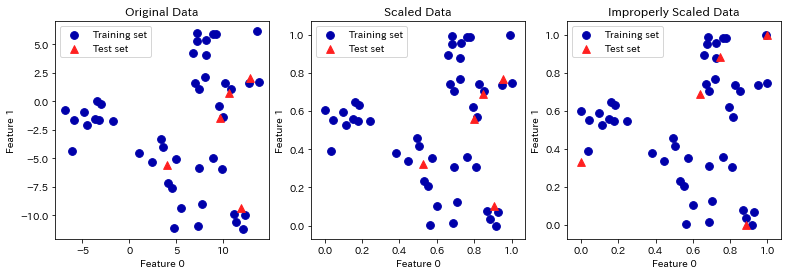

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label='Training set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',c=mglearn.cm2(1), label='Test set', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

#scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label='Training set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',c=mglearn.cm2(1), label='Test set', s=60)
axes[1].legend(loc='upper left')
axes[1].set_title('Scaled Data')

#テストセットを訓練セットは別のスケーリングで変換すると...

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled_badly = scaler.fit_transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label='Training set', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',c=mglearn.cm2(1), label='Test set', s=60)
axes[2].legend(loc='upper left')
axes[2].set_title('Improperly Scaled Data')

for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

テストセットと訓練セットを別々のスケーリングを用いて変換した場合、分布が全く異なるものになっていることがわかる。データを勝手に動かしたことになるのでこれはまずい。

## 教師あり学習におけるスケーリングの効果

In [85]:
from sklearn.svm import SVC

In [86]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [88]:
svm = SVC(C=100, gamma='auto')
svm.fit(X_train, y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [89]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
svm.fit(X_train_scaled, y_train)
print('Scaled test set accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97
